### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

### Load the dataset

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
# first 3 rows
df.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [4]:
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

In [5]:
# datatype of each feature
df.dtypes

Month         object
Passengers     int64
dtype: object

In [6]:
# changing the datatype of feature 'month' to datetime
df['Month'] = pd.to_datetime(df['Month'])

In [7]:
df.head(2)

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118


In [8]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [9]:
# Setting the month feature as a index
df.set_index('Month', inplace=True)

In [10]:
df.head(3)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


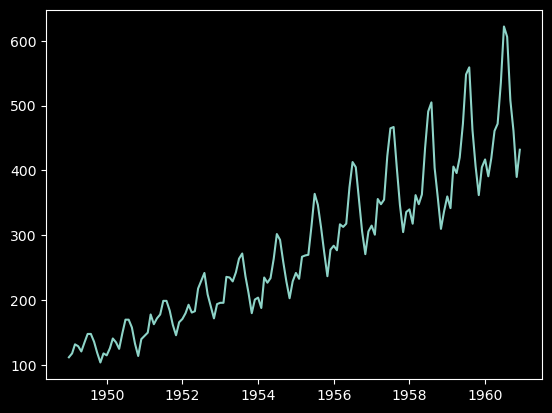

In [12]:
plt.plot(df['Passengers'])
plt.show()

### Is the data stationary?

In [13]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")

pvalue =  0.9918802434376411  if above 0.05, data is not stationary


#### Since data is not stationary, we may need SARIMA and not just ARIMA

In [14]:
# creating new features
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]

In [15]:
df.head(3)

,Passengers,year,month
Month,,,
1949-01-01,112,1949,Jan
1949-02-01,118,1949,Feb
1949-03-01,132,1949,Mar


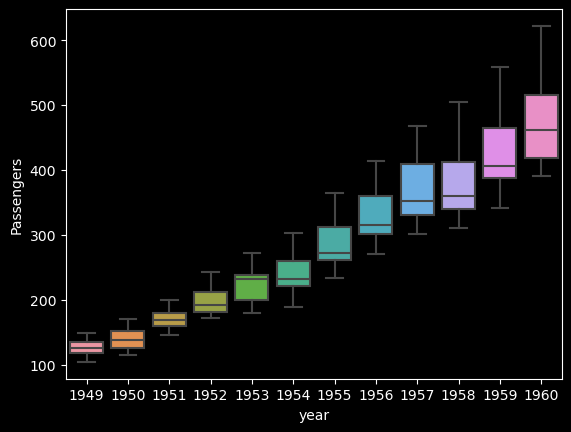

In [16]:
#Plotting yearly values as boxplot
sns.boxplot(x='year', y='Passengers', data=df)
plt.show()

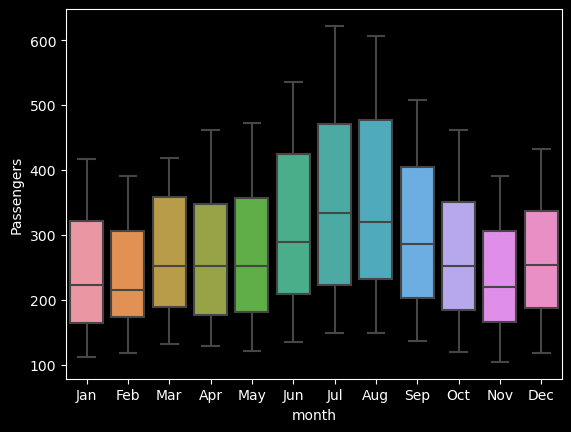

In [17]:
#Plotting monthly values as boxplot
sns.boxplot(x='month', y='Passengers', data=df)
plt.show()

### Extract and plot trend, seasonal and residuals

- #### Additive time series:
        Value = Base Level + Trend + Seasonality + Error
- #### Multiplicative Time Series:
        Value = Base Level x Trend x Seasonality x Error

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['Passengers'],  
                            model ='additive')

In [19]:
trend = decomposed.trend
seasonal = decomposed.seasonal #Cyclic behavior may not be seasonal!
residual = decomposed.resid

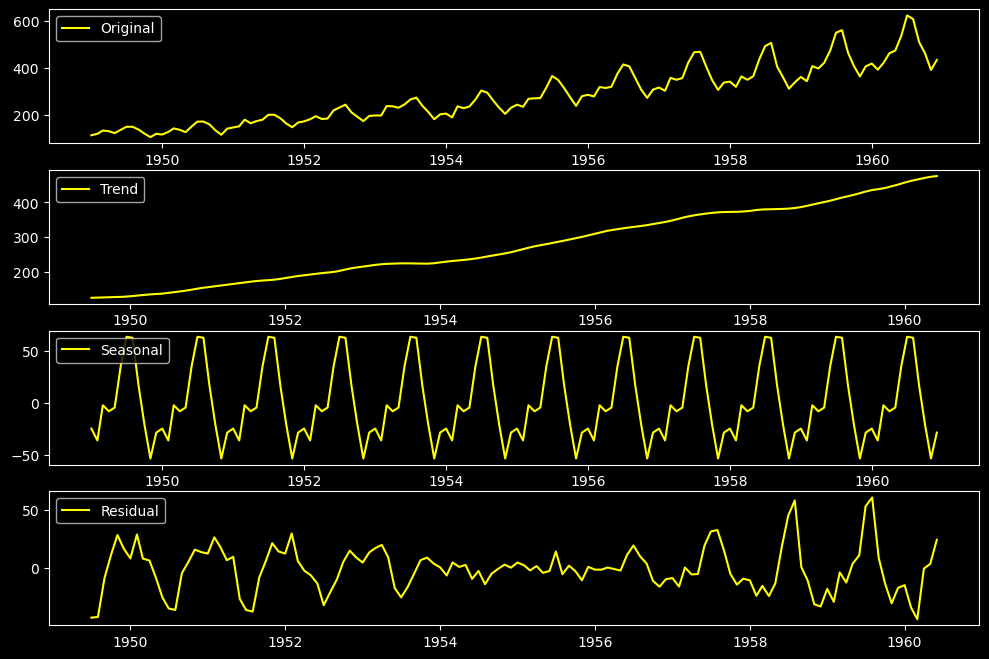

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Passengers'], label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

### AUTOCORRELATION

- Autocorrelation is simply the correlation of a series with its own lags.
- Plot lag on x axis and correlation on y axis
- Any correlation above confidence lnes are statistically significant.

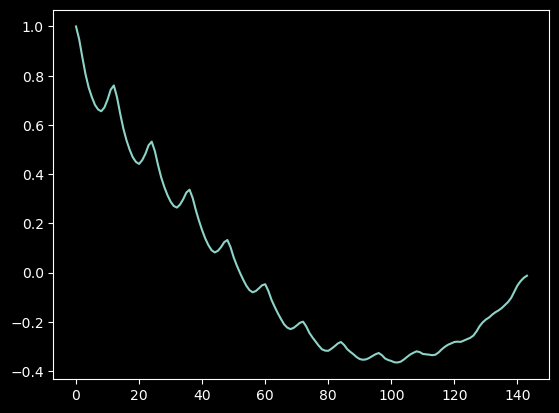

In [21]:
from statsmodels.tsa.stattools import acf

acf_144 = acf(df.Passengers, nlags=144)
plt.plot(acf_144)
plt.show()

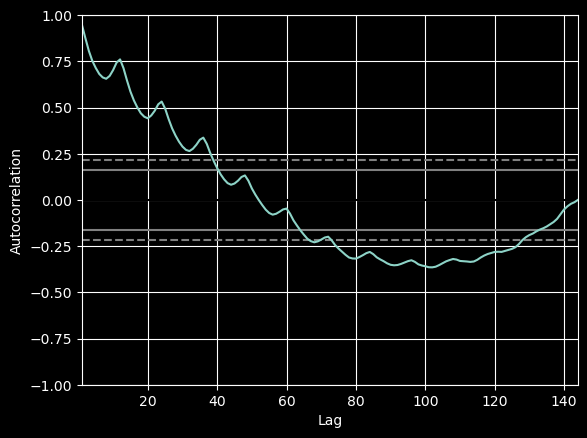

In [23]:
#Obtain the same but with the pandas
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.Passengers)
plt.show()

- Horizontal bands indicate 95% and 99% (dashed) confidence bands

- A strong positive correlation for lags below 40 (months)